In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [94]:
df = pd.DataFrame({
    'x':[14,45,87,32,14,,66,,98,,25,33,98,87,54,14,55,66,25,36,70,45,22,98,29,94,90,89,80,70,85,,10,60,65,60,67,78,80],
    'y':[78,54,69,25,44,15,98,47,,45,12,32,25,45,16,19,78,,25,22,11,33,66,15,44,11,15,,12,34,23,44,44,88,87,,95,78,70]
})

SyntaxError: invalid syntax (Temp/ipykernel_15836/495095014.py, line 2)

In [85]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)

In [86]:
labels = km.predict(df)
labels
#centroids = km.cluster_centers_

array([0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2])

In [87]:
df['cluster'] = labels

In [88]:
df


,x,y,cluster
0,14,78,0
1,45,54,0
2,87,69,2
3,32,25,0
4,14,44,0
5,55,15,1
6,66,98,2
7,35,47,0
8,98,12,1
9,14,45,0


In [89]:
km.cluster_centers_

array([[26.2       , 39.33333333],
       [83.35714286, 21.5       ],
       [68.4       , 84.1       ]])

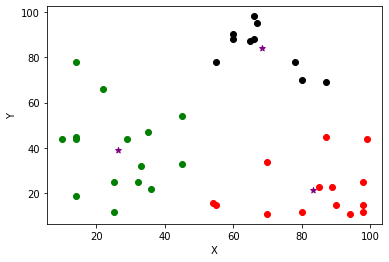

In [90]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.x,df1.y, color = 'green')
plt.scatter(df2.x,df2.y, color = 'red')
plt.scatter(df3.x,df3.y, color = 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',label='centroid',marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [91]:
K_rng = range(1,10)
sse = []
for k in K_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['x','y']])
    sse.append(km.inertia_)

In [92]:
sse

[61843.1282051282,
 35821.114285714284,
 13111.747619047619,
 8855.452777777777,
 7250.111111111111,
 5743.099999999999,
 4653.708333333333,
 4052.883333333333,
 2755.885714285714]

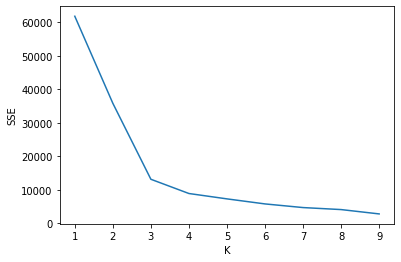

In [93]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(K_rng,sse)